In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cv2 as cv

from aiblitz.model import get_piece
from aiblitz.segment import show_grid, piece_to_idx, segment_image

# Looking at the Input Data

## Problem 1 - Pieces

In [2]:
df_train = pd.read_csv("data/Q1/train.csv")
df_val = pd.read_csv("data/Q1/val.csv")

df_train.head()

ImageID  label
0        0  black
1        1  white
2        2  black
3        3  black
4        4  black

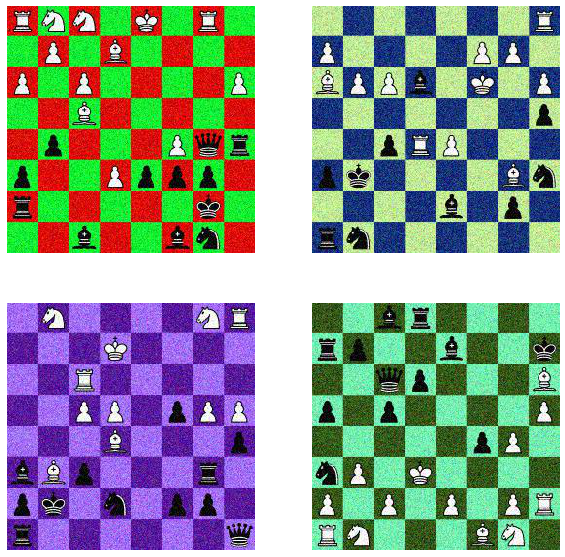

In [3]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread("data/Q1/train/%d.jpg" % df_train.iloc[i + 6]["ImageID"])
    plt.axis('off')
    plt.imshow(image)

## Problem 2 - Points

In [4]:
df_train = pd.read_csv("data/Q2/train.csv")
df_val = pd.read_csv("data/Q2/val.csv")

df_train.head()

ImageID  label
0        0  black
1        1  white
2        2  white
3        3  white
4        4  white

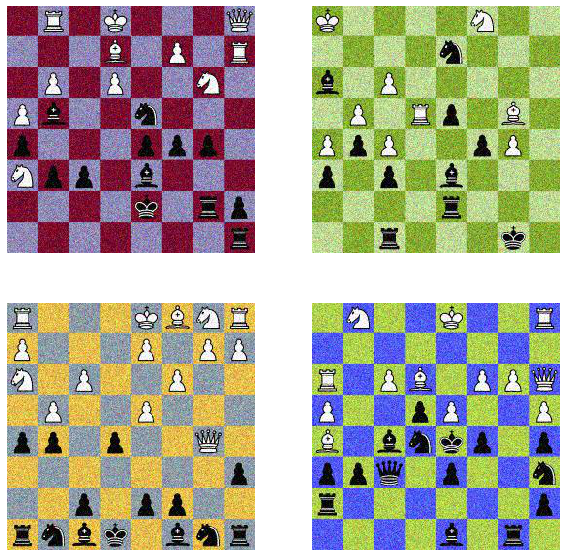

In [5]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread("data/Q2/train/%d.jpg" % df_train.iloc[i + 6]["ImageID"])
    plt.axis('off')
    plt.imshow(image)

## Problem 3 - Configuration

In [6]:
df_train = pd.read_csv("data/Q3/train.csv")
df_val = pd.read_csv("data/Q3/val.csv")

df_train.head()

ImageID                                              label
0        0  1rbqkb1r/p1p1n1pp/1pn1p3/1P1p1p2/3P4/N3B2P/P1P...
1        1          2bk4/2q1p3/3p3P/5r2/r5nP/P2K2N1/8/2q1NB1R
2        2  3rnq2/3k1p2/5rP1/pppp1P2/P1BP2P1/RPP1K2N/3B3P/...
3        3  r4br1/1p2ppp1/3k2Pp/p2P3n/2pP1N2/P1P1K3/nP5P/1...
4        4     4kn2/8/p6b/1p6/P1p1p1pr/1P2P1N1/1R1r3P/1K2R1N1

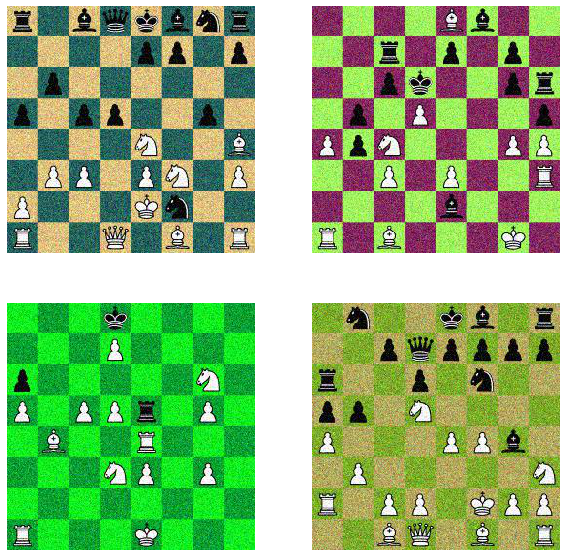

In [7]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread("data/Q3/train/%d.jpg" % df_train.iloc[i + 6]["ImageID"])
    plt.axis('off')
    plt.imshow(image)

## Problem 5 - Win Prediction

In [8]:
df_train = pd.read_csv("data/Q5/train.csv")
df_val = pd.read_csv("data/Q5/val.csv")

df_train.head()

ImageID   turn  label
0        0  white  white
1        1  black  white
2        2  white  black
3        3  white  white
4        4  white  black

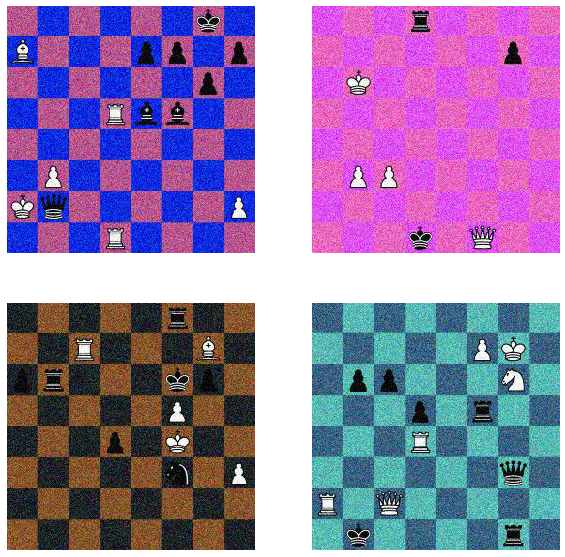

In [9]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread("data/Q5/train/%d.jpg" % df_train.iloc[i + 6]["ImageID"])
    plt.axis('off')
    plt.imshow(image)

# Looking at the Hard Samples

In [10]:
piece_images = {
    piece: get_piece(piece) for piece in piece_to_idx.keys()}

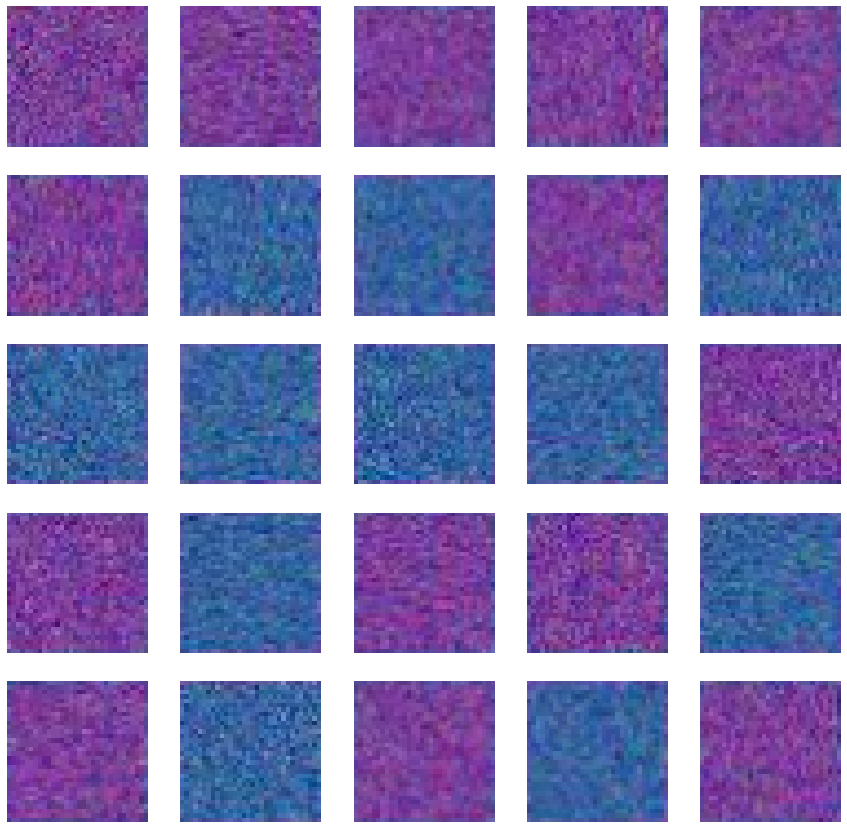

In [11]:
n_pieces = len(piece_images)
plt.figure(figsize=(15, 15))
for idx, image in enumerate(piece_images[' '][:25]):
    plt.subplot(5, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image)
plt.show()

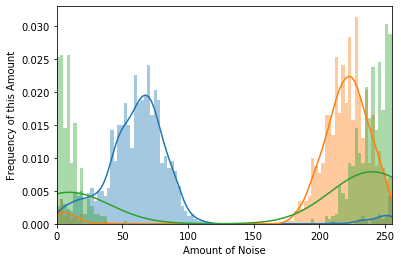

In [12]:
image_1, image_2 = 2, 6
noise_r = np.abs(piece_images[' '][image_1][:, :, 0] - piece_images[' '][image_2][:, :, 0]).reshape(-1)
noise_g = np.abs(piece_images[' '][image_1][:, :, 1] - piece_images[' '][image_2][:, :, 1]).reshape(-1)
noise_b = np.abs(piece_images[' '][image_1][:, :, 2] - piece_images[' '][image_2][:, :, 2]).reshape(-1)
sns.distplot(noise_r, bins=100)
sns.distplot(noise_g, bins=100)
sns.distplot(noise_b, bins=100)
plt.xlim(0, 255)
plt.xlabel('Amount of Noise')
plt.ylabel('Frequency of this Amount')
plt.show()

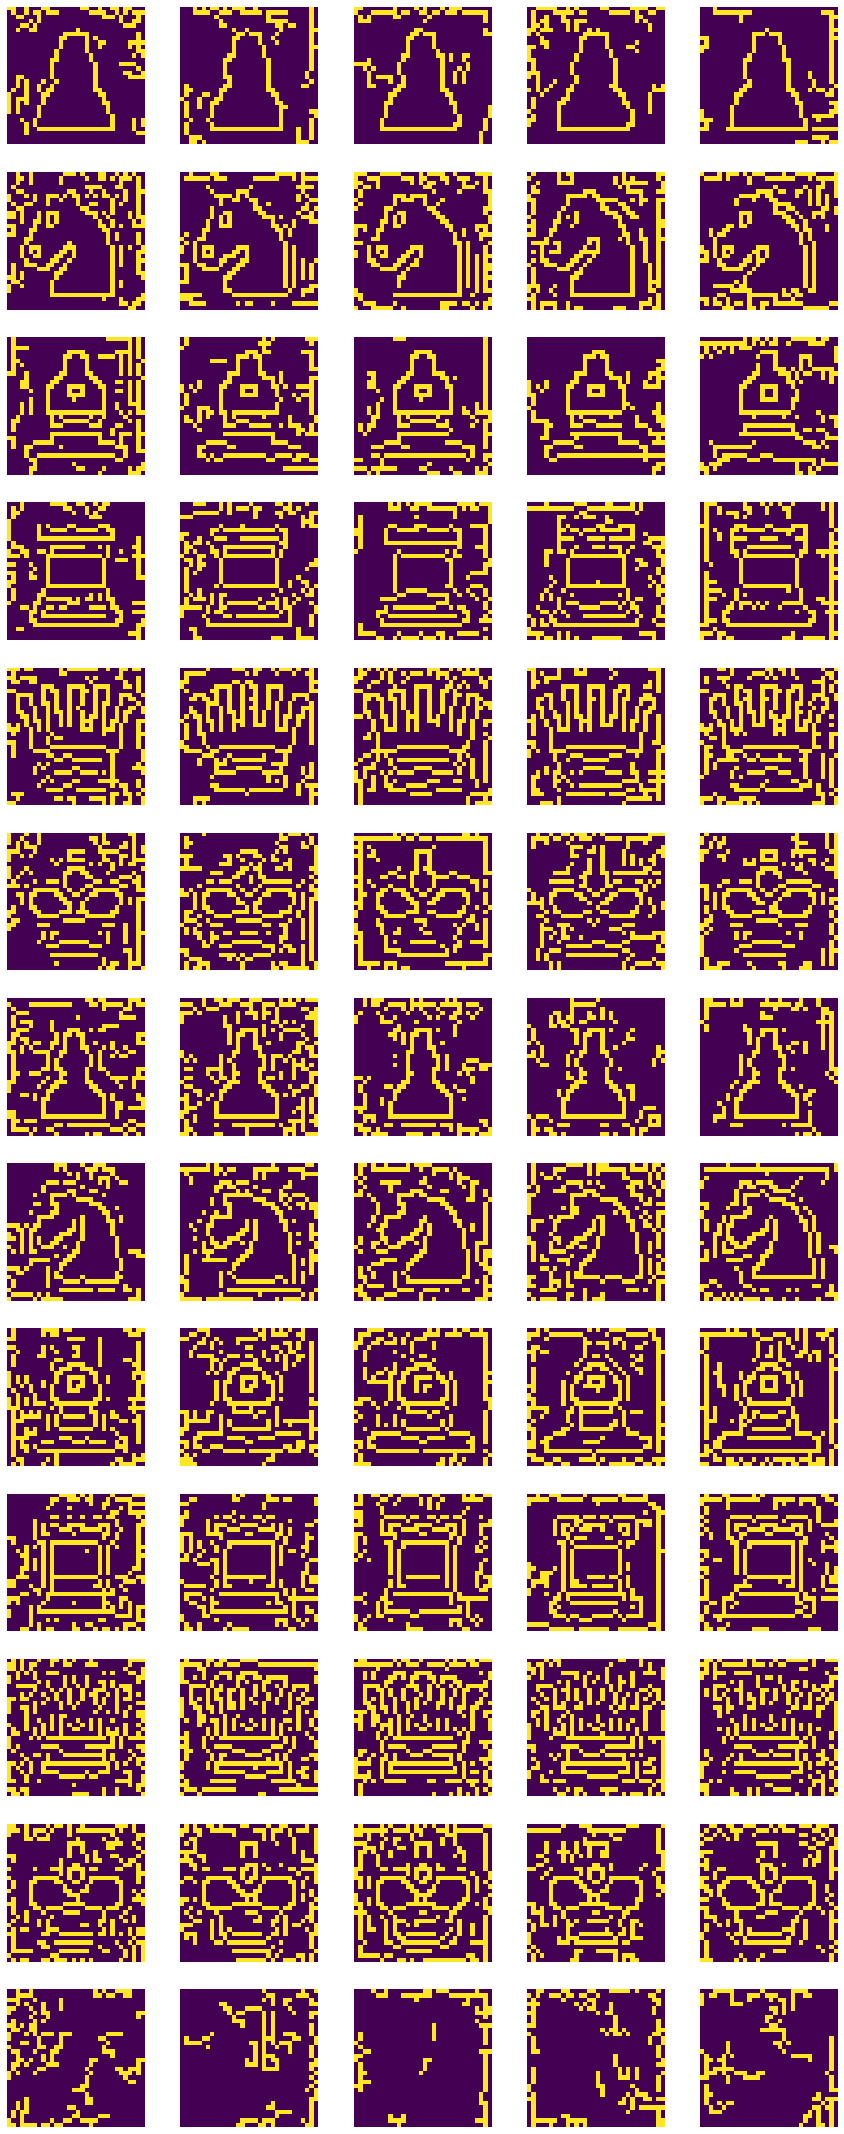

In [13]:
n_pieces = len(piece_images)
plt.figure(figsize=(15, 3 * n_pieces))
for piece_idx, piece_data in enumerate(piece_images.values()):
    for idx, image in enumerate(piece_data[:5]):
        image = cv.Canny(image, 100, 200)
        plt.subplot(n_pieces, 5, 5 * piece_idx + idx + 1)
        plt.imshow(image)
        plt.axis('off')
plt.show()

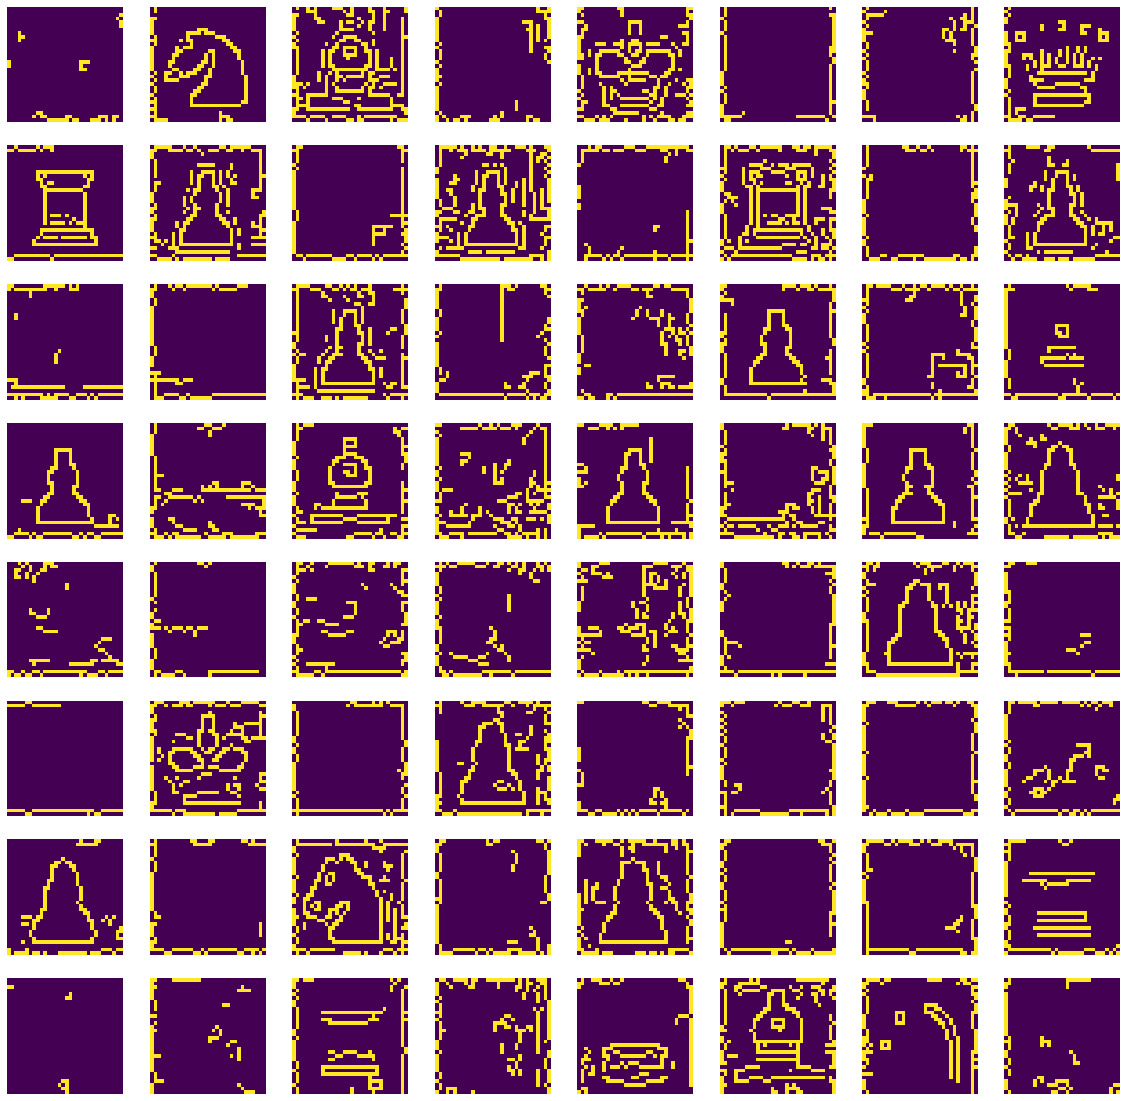

In [14]:
image = plt.imread("data/Q1/test/1539.jpg")
image = segment_image(image)
filtered_image = np.zeros((8, 8, 32, 32))
for i in range(8):
    for j in range(8):
        sub_image = image[i, j].transpose(1, 2, 0)
        sub_image = cv.Canny(sub_image, 150, 250)
        filtered_image[i, j] = sub_image
plt.figure(figsize=(20, 20))
for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        plt.axis('off')
        plt.imshow(filtered_image[i, j])
plt.show()

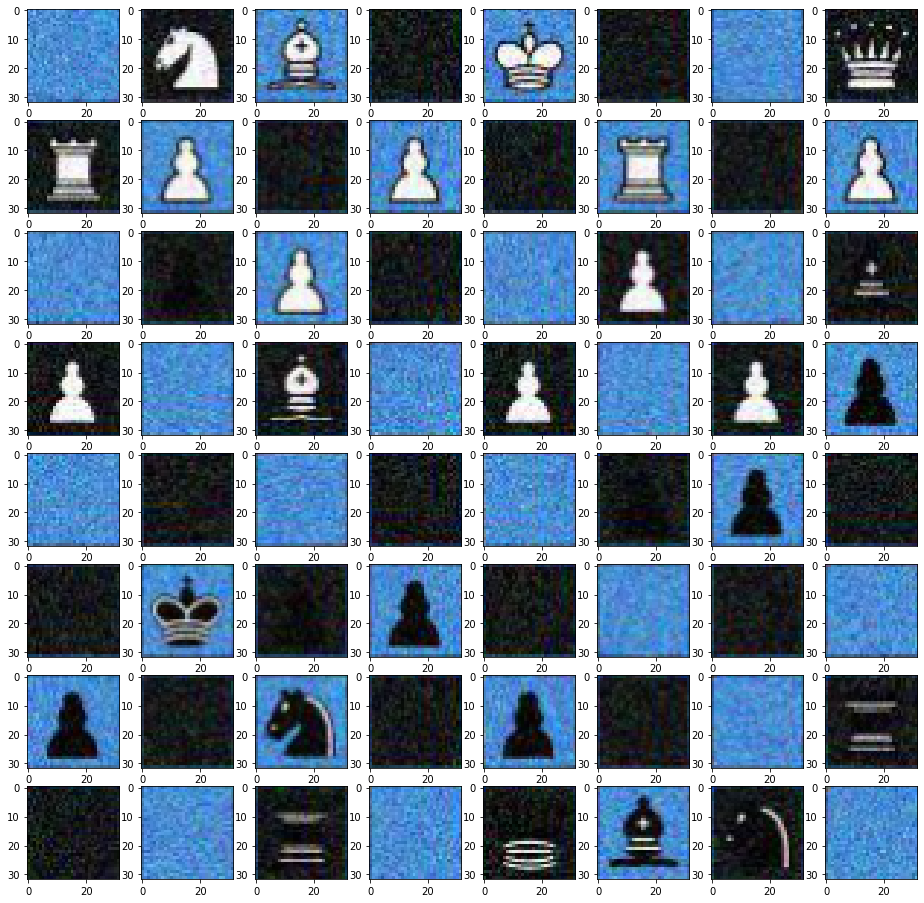

In [15]:
show_grid(image)
plt.show()

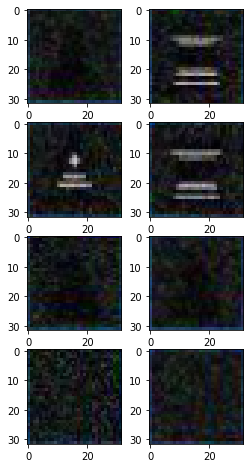

In [41]:
pieces = [(2, 1), (7, 2), (2, 7), (6, 7), (4, 5), (5, 2), (0, 3), (6, 5)]

plt.figure(figsize=(4, 8))
for idx, piece in enumerate(pieces):
    plt.subplot(4, 2, idx + 1)
    plt.imshow(image[piece].transpose(1, 2, 0))
plt.show()

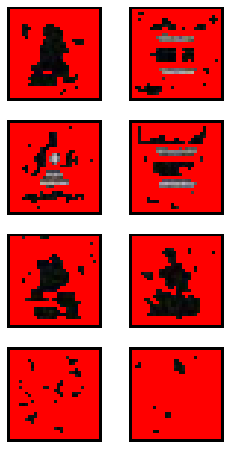

In [42]:
plt.figure(figsize=(4, 8))
for idx, piece in enumerate(pieces):
    plt.subplot(4, 2, idx + 1)

    analysis = image[piece].transpose(1, 2, 0)
    mask = np.zeros(analysis.shape, dtype=int)
    for i in range(1, analysis.shape[0] - 1):
        for j in range(1, analysis.shape[1] - 1):
            if np.all(np.mean(analysis[i-1:i+2, j-1:j+2], axis=(0,1)) < 20):
                mask[i, j] = analysis[i, j]
            elif np.all(np.mean(analysis[i-1:i+2, j-1:j+2], axis=(0,1)) > 70):
                mask[i, j] = analysis[i, j]
            else:
                mask[i, j] = [255, 0, 0]
    plt.axis('off')
    plt.imshow(mask)
plt.show()